In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Differential Equations


We will deal with *initial value problems* (IVP) defined by a first-order ODE, and an initial value:

$$\dot{y} = f(y, t), \quad y(t_{0}) = y_{0},$$

where we use the shorthand notation $\dot{y} := \frac{\mathrm{d}y}{\mathrm{d}t}$ common in physics.

A general solution to an ODE is a function $y: I \times \mathbb{R}^{n} ⟶ \mathbb{R}^{n}$: a 1-parameter (usually time is the parameter) family of transformations of the state space. A 1-parameter family of transformations is often called a *flow*. The existence and uniqueness of solutions to an IVP is ensured by the Picard-Lindel&ouml;f theorem, provided the RHS of the ODE is *Lipschitz continuous*. Lipschitz continuity is a property that pops up quite often in ODE-related results in ML so we provide a definition here:

A function $f: X \subset \mathbb{R}^{n} ⟶ \mathbb{R}^{n}$ is called *Lipschitz continuous* (with constant $\lambda$) if

$$|| f(x_{1}) - f(x_{2}) || \leq \lambda ||x_{1} - x_{2}|| \quad \forall x_{1},x_{2} \in X.$$

#### Example 1: Lotka-Volterra equations
Consider the IVP

$$
\begin{aligned}
\dot{x} = x - xy \\
\dot{y} = xy - y,
\end{aligned}
$$

with initial value $(x_{0}, y_{0}) = (1, 2)$. There is no closed form solution to this system of ODEs. 

Note that $x,y$ are impicitly assumed to be functions of time

In [10]:
def LV(x, y):
    """
        defines dynamics for Lotka-Volterra equations
        returns derivative [x', y'] w.r.t. time(t) for a point
    """
    return np.array([x - x*y, x*y - y])

#### Example 2: Differential Equation of a Simple Pendulum
Let us consider the differential equation of the simple pendulum of mass 1, length 1, and $g$ set to 1 for convenience:

$$
\ddot{\theta} + \sin{\theta} = 0.
$$


This is a second-order ODE, but it can be transformed in the following equivalent system of first-order ODEs by introducing the auxiliary variable $p_{\theta} = \dot{\theta}$:

$$
\begin{align}
&\dot{\theta} = p_{\theta} \\
&\dot{p_{\theta}} = -\sin(\theta).
\end{align}
$$

A solution to this ODE will be of the form $(\theta(t), p_{\theta}(t))$

In [61]:
def pendulum(x, y):
    """
        defines the dynamics of a simple pendulum
        returns derivative of pendulum equations
    """
    return np.array([y, -np.sin(x)])

### Numerical ODE Solvers

Solving differential equations analytically is not an option for complicated $f$, even for simple $f$ given above which don't have closed form solutions. We need numerical solvers.
Runge-Kutta methods are a family of iterative methods that find approximate solutions to IVPs. We describe the simplest and most intuitive Runge-Kutta method, the **Euler** method.

Consider the IVP

$$\dot{y} = f(y, t), \quad y(t_{0}) = y_{0}.$$

where $y(t_0)$, and $f$ are given.

Pick a step-size $h>0$, a number of steps $N$, and define

$$
\begin{aligned}
&y_{n+1} = y_{n} + hf(y_{n}, t_{n}) \\
&t_{n+1} = t_{n} + h.
\end{aligned}
$$

This is the most basic numerical integrator. One intuition behind the Euler method is that we are evolving the trajectories by iteratively taking small steps in the direction of the slope.

<center width="100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/DL2/Dynamical_systems/Euler_method.svg.png?raw=1" width="200px"></center>

(Figure credit: [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/1/10/Euler_method.svg))

Another method from Runge-Kutta family is called *classic Runge-Kutta* or *RK4*. This is a fourth-order method total error is of order $O\big(h^{4}\big)$. We will not describe this is detail but we provide the code for rk4.

In [62]:
def rk4(f, x0, y0, h, n):
    """
        rk4 solver: takes derivative function(f), initial values(x0,y0), step-size(h), number of points(n)
    """
    v = [0]*(n+1)
    v[0] = np.array([x0, y0])
    x = x0
    y = y0
    for i in range(1, n + 1):
        k1 = h*f(x, y)
        k2 = h*f(x + 0.5*k1[0], y + 0.5*k1[1])
        k3 = h*f(x + 0.5*k2[0], y + 0.5*k2[1])
        k4 = h*f(x + k3[0], y + k3[1])
        v[i] =  v[i-1] + (k1 + k2 + k2 + k3 + k3 + k4)/6
        x = v[i][0]
        y = v[i][1]

    t = np.array([i*h for i in range(0, n+1)])
    return t, np.array(v)

def euler(f, x0, y0, h, n):
    """
        euler solver: takes derivative function(f), initial values(x0,y0), step-size(h), number of points(n)
    """
    v = [0]*(n+1)
    v[0] = np.array([x0, y0])
    x = x0
    y = y0

    for i in range(1, n + 1):
        v[i] =  v[i-1] + h*f(x, y)
        x = v[i][0]
        y = v[i][1]

    t = np.array([i*h for i in range(0, n+1)])
    return t, np.array(v)

### Comparing the performance of Solvers on Lotka-Volterra Equations

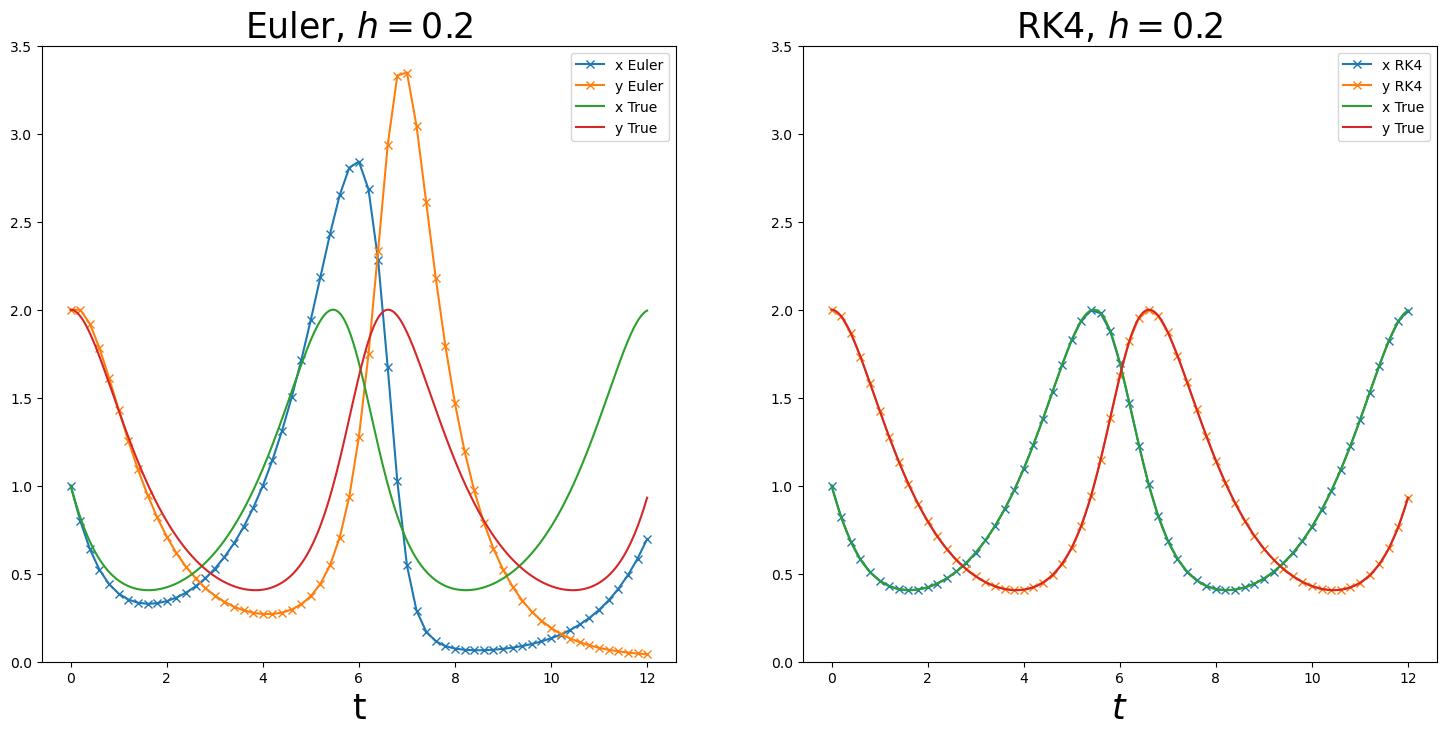

In [67]:
def plot_integrator(v_euler, v_rk4, t_euler, t_rk4, v_true, t_true, h):

    fig = plt.figure(figsize=(18,8))
    ax0 = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)

    ax0.plot(t_euler, v_euler, marker = 'x')
    ax1.plot(t_rk4, v_rk4, marker = 'x')

    ax0.plot(t_true, v_true)
    ax1.plot(t_true, v_true)

    ax0.set_ylim(0, 3.5)
    ax1.set_ylim(0, 3.5)

    ax0.set_xlabel(r"t", fontsize=25)
    ax0.set_title("Euler, $h=$"+h, fontsize=25)
    ax0.legend(["x Euler", "y Euler", "x True", "y True"])
    ax1.set_xlabel(r"$t$", fontsize=25)
    ax1.set_title("RK4, $h=$"+h, fontsize=25)
    ax1.legend(["x RK4", "y RK4", "x True", "y True"])
# plotting script

h = 0.2 # step size

t_euler, v_euler = euler(LV, 1., 2., h, 60)
t_rk4, v_rk4 = rk4(LV, 1., 2., h, 60)
# We approximate the true solution using a very small step size and a lot of steps
t_true, v_true = rk4(LV, 1., 2., 0.003, 4000) 

plot_integrator(v_euler, v_rk4, t_euler, t_rk4, v_true, t_true, str(h))

Given a solution to IVP, $x(t), y(t)$ for a initial point we can plot a path, this is called phase space. A set of these paths for different initial values is called phase space portrait.

In [57]:
def plot_phase_space(v):
    fig = plt.figure(figsize=(10,6))
    ax0 = fig.add_subplot(111)

    x_points = [p[0] for p in v]
    y_points = [p[1] for p in v]
    ax0.plot(x_points, y_points )
    ax0.scatter(x_points[0], y_points[0], marker="o", s=100, label="initial value")
    ax0.set_xlabel(r"$\theta$", fontsize=25)
    ax0.set_ylabel(r"$p_{\theta}$", fontsize=25)
    ax0.set_title("Phase space", fontsize=25)
    ax0.legend()
    ax0.set_aspect('equal')

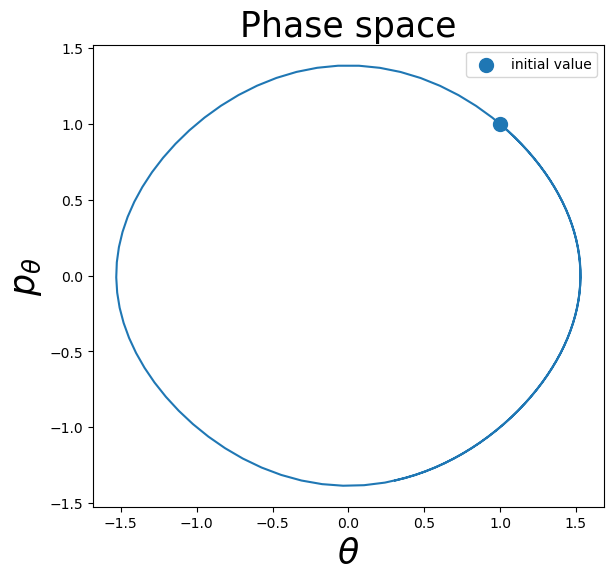

In [68]:
t_pendulum, v_pendulum = rk4(pendulum, 1., 1., 0.1, 100)
plot_phase_space(v_pendulum)

In [65]:
def plot_phase_space_pendulum(V):

    fig = plt.figure(figsize=(18,8))
    ax0 = fig.add_subplot(121)
    for v in V:
      x_points = [p[0] for p in v]
      y_points = [p[1] for p in v]
      ax0.plot(x_points, y_points, color='b')
      # ax0.scatter(x_points[0], y_points[0], marker = 'x')

    ax0.set_xlabel(r"$\theta$", fontsize=25)
    ax0.set_ylabel(r"$p_{\theta}$", fontsize=25)
    ax0.set_title("Phase space portrait", fontsize=25)
    ax0.set_aspect('equal')

def plot_phase_space_LV(V):

    fig = plt.figure(figsize=(18,8))
    ax0 = fig.add_subplot(121)
    for v in V:
    #   ax0.plot([p[0] for p in v], [p[1] for p in v], color='b')
      ax0.plot([p[0] for p in v], [p[1] for p in v])

    ax0.set_xlabel(r"$x$", fontsize=25)
    ax0.set_ylabel(r"$y$", fontsize=25)
    ax0.set_title("Phase space portrait", fontsize=25)

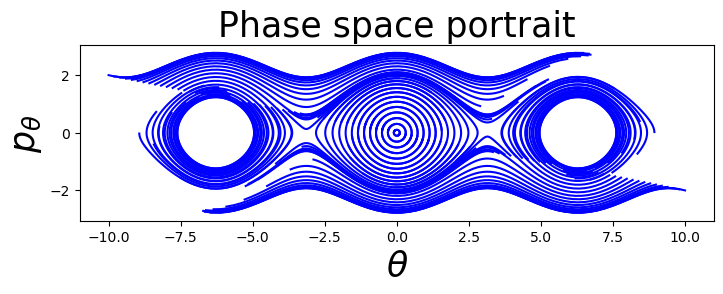

In [66]:
IV = [[5*i, -i] for i in np.linspace(-2, 2, 100)] # initial values
paths = []
for iv in IV:
  t, v = rk4(pendulum, iv[0], iv[1], 0.1, 70)
  paths.append(v)

plot_phase_space_pendulum(paths)

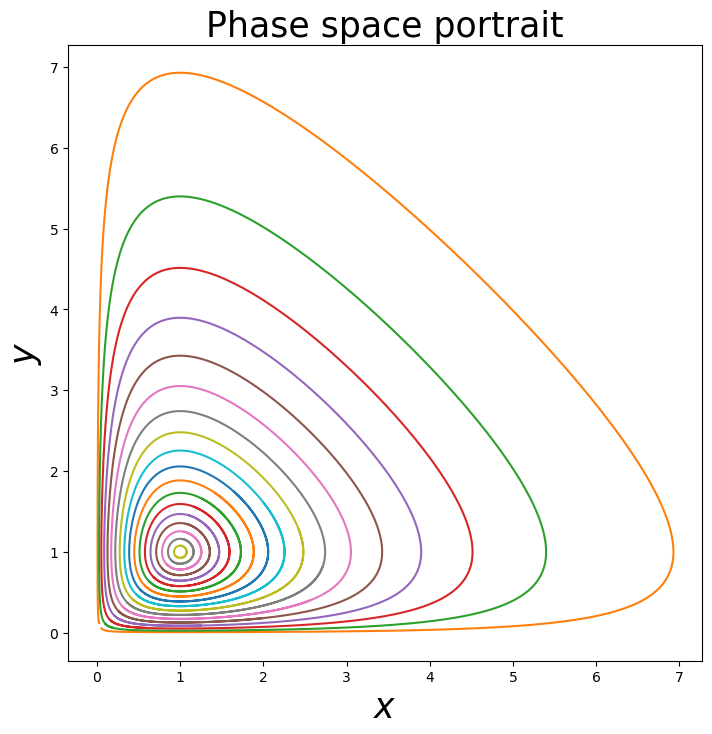

In [29]:
IV = [[i, i] for i in np.linspace(0, 1, 20)] # initial values
paths = []
for iv in IV:
  t, v = rk4(LV, iv[0], iv[1], 0.01, 1000)
  paths.append(v)

plot_phase_space_LV(paths)